In [5]:
# importing os module
import os
import numpy as np
from PIL import Image
from numpy import asarray

In [47]:
emotion = "anger"
filename = "an_20.png"

folder = "C:/Users/User/Project 4/archive/"+emotion
img = Image.open(f"{folder}/{filename}")

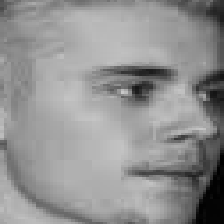

In [48]:
img

In [50]:
img_data = asarray(img)
img_data

array([[ 80,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 85,  85,  85, ...,  48,  48,  48],
       ...,
       [166, 166, 166, ...,   3,   3,   3],
       [163, 163, 163, ...,   3,   3,   3],
       [163, 163, 163, ...,   3,   3,   3]], dtype=uint8)

In [52]:
test = np.expand_dims(img_data, axis=0)
test.shape

(1, 224, 224)

In [106]:
def img_to_array(emotion):
    #first_two = emotion[0:2]
    x = []
    y = []
    #x.append([])
    #x[0].append([])
    folder = "C:/Users/User/Project 4/archive/"+emotion
    for count, filename in enumerate(os.listdir(folder)):
        # load the image
        img = Image.open(f"{folder}/{filename}")
        # asarray() class is used to convert
        # PIL images into NumPy arrays
        img_data = asarray(img)
        #img_data = img_data.reshape(-1,1)
        #np.append(X, img_data,axis=0)
        x.append(img_data)
        y.append(filename[0:2])
    return x,y

In [107]:
feature,target = img_to_array("anger")


In [108]:
feature

[array([[118, 118, 118, ..., 168, 168, 168],
        [118, 118, 118, ..., 168, 168, 168],
        [144, 144, 144, ..., 182, 182, 182],
        ...,
        [  3,   3,   3, ...,  13,  13,  13],
        [  5,   5,   5, ...,  20,  20,  20],
        [  5,   5,   5, ...,  20,  20,  20]], dtype=uint8),
 array([[13, 12, 16, ..., 32, 42, 54],
        [11, 10, 13, ..., 41, 36, 45],
        [11, 12,  7, ..., 33, 29, 30],
        ...,
        [27, 30, 34, ..., 80, 73, 63],
        [23, 29, 33, ..., 74, 67, 57],
        [21, 26, 27, ..., 69, 66, 55]], dtype=uint8),
 array([[ 53,  53,  54, ..., 116, 146, 146],
        [ 53,  53,  54, ..., 116, 146, 146],
        [ 54,  54,  54, ..., 132, 123, 123],
        ...,
        [ 15,  15,  12, ...,  68,  92,  92],
        [ 32,  32,  20, ...,  63,  74,  74],
        [ 32,  32,  20, ...,  63,  74,  74]], dtype=uint8),
 array([[ 13,  13,  11, ...,  41,  53,  53],
        [ 15,  15,  12, ...,  39,  47,  47],
        [ 16,  16,  15, ...,  36,  42,  42],
       

In [100]:
feature_arr = np.array(feature)

In [101]:
feature_arr.shape

(890, 224, 224)

In [109]:
target

['an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',
 'an',